In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import csv

In [42]:
# read in data
df = pd.read_csv('./cardio_train.csv', delimiter=';')
print(df.head())

   id    age  gender  height  weight  ...  gluc  smoke  alco  active  cardio
0   0  18393       2     168    62.0  ...     1      0     0       1       0
1   1  20228       1     156    85.0  ...     1      0     0       1       1
2   2  18857       1     165    64.0  ...     1      0     0       0       1
3   3  17623       2     169    82.0  ...     1      0     0       1       1
4   4  17474       1     156    56.0  ...     1      0     0       0       0

[5 rows x 13 columns]


In [43]:
df_feat = df.iloc[:,1:-1] # eventhing but last column
target = df.iloc[:,-1] #last column

df_feat.head() # age in days

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


In [4]:
from sklearn.preprocessing import StandardScaler
# standardize: mean = 0, std = 1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_feat)
scaled_features.shape # np array
print(scaled_features)

# citation: https://realpython.com/k-means-clustering-python/

[[-0.43606151  1.36405487  0.44345206 ... -0.31087913 -0.23838436
   0.49416711]
 [ 0.30768633 -0.73310834 -1.01816804 ... -0.31087913 -0.23838436
   0.49416711]
 [-0.24799666 -0.73310834  0.07804703 ... -0.31087913 -0.23838436
  -2.02360695]
 ...
 [-0.16328642  1.36405487  2.27047718 ... -0.31087913  4.19490608
  -2.02360695]
 [ 1.20058905 -0.73310834 -0.16555632 ... -0.31087913 -0.23838436
  -2.02360695]
 [ 0.43414373 -0.73310834  0.68705541 ... -0.31087913 -0.23838436
   0.49416711]]


In [5]:
# let N = number of clusters
max_clusters = 40
# store centers
centers = [] # num_features by max_clusters
errors = [] #sse

# store errors

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

for i in range(1,max_clusters+1):
    kmeans = KMeans(n_clusters=i, **kmeans_kwargs)  
    kmeans.fit(scaled_features)
    centers.append(kmeans.cluster_centers_) # centers
    errors.append(kmeans.inertia_) # errors
    #print(kmeans.inertia_)

 

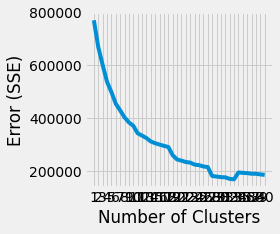

In [6]:
# plot results (N on error)
plt.style.use("fivethirtyeight")
plt.figure(figsize=(3, 3))
plt.plot(range(1, max_clusters+1), errors)
plt.xticks(range(1, max_clusters+1))
plt.xlabel("Number of Clusters")
plt.ylabel("Error (SSE)")
plt.show()

In [10]:
from kneed import KneeLocator
# find optimal number of clusters
kl = KneeLocator(
    range(1, max_clusters+1), errors, curve="convex", direction="decreasing"
)

opt_n = kl.elbow # 9 


In [13]:
opt_n = 9
# for optimal number of clusters opt_n = 9
kmeans = KMeans(
    init="random",
    n_clusters=opt_n,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(scaled_features)
error = kmeans.inertia_
labels = kmeans.labels_[:] # get labels # (70000,)
# sum counts 1 to opt_n --> size of clusters

array([6, 0, 0, ..., 5, 7, 0], dtype=int32)

In [52]:
df['label'] = labels
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,label
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,6
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,6
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,7


In [56]:
csv_name = "group" + str(i)

for i in range(9):
  csv_name = "Cluster" + str(i)
  dfx = df[df['label'] == i]
  dfx.drop(labels = "label", axis = 1).to_csv(csv_name)
  print(dfx.head())

    id    age  gender  height  weight  ...  smoke  alco  active  cardio  label
1    1  20228       1     156    85.0  ...      0     0       1       1      0
2    2  18857       1     165    64.0  ...      0     0       0       1      0
6    9  22113       1     157    93.0  ...      0     0       1       0      0
22  32  23046       1     158    90.0  ...      0     0       1       1      0
24  35  16608       1     170    68.0  ...      0     0       1       1      0

[5 rows x 14 columns]
    id    age  gender  height  weight  ...  smoke  alco  active  cardio  label
8   13  17668       1     158    71.0  ...      0     0       1       0      1
25  36  14453       1     153    65.0  ...      0     0       1       0      1
27  38  18085       1     159    78.0  ...      0     0       1       0      1
32  44  14605       1     159    60.0  ...      0     0       1       0      1
37  51  17976       1     164    70.0  ...      0     0       1       0      1

[5 rows x 14 columns]
    id

In [12]:
import numpy as np
# check size of clusters 

cluster_sizes = np.zeros(opt_n)
for label in labels:
    cluster_sizes[label]+=1

print(cluster_sizes) # size of clusters decreasing [4,7,8,0]

# FUNCTION: cluster_id by size (decreasing) [TODO]

[ 6968. 11549.  4084.  5043.   928.  3691. 12159. 10791. 14787.]


Feature selection: ANOVA F-test

Some ideas:
- Establish a baseline performance with all features
- Try separate feature selection method for each input type
- Try wrapper method (e.g. RFE) agnostic to input type

In [ ]:
# visualize 
# FIND two dimensions (features) to visualize [TODO]
# **most distinct/different between clusters (scientific way)

# PLOT [TODO]

# test: age on ap_lo (blood pressure)

In [ ]:
# pick three largest clusters (most data points) out of optimal sorting to train models on + general model
# Note: may only be working on subset of data

# separate top clusters into separate data frames [TODO]
# interpret clusters [TODO]

Models to try for binary classification
- penalized logistic regression
    - L1-norm ("lasso"), L2-norm ("ridge"), a combination of the two ("elastic"), or a penalty associated to groups of variables ("group lasso").
- random forest